In [183]:
#Import all needed dependencies...
import json
import requests
import pandas as pd
from pandas import json_normalize
from api_key import gkey
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [184]:
#Reading into CSV file and adding all coord data into a list.
#Seperated each component into its own variable to be called upon seperately later on.
data = 'NYC_2019.csv'
data_df = pd.read_csv(data)
data_df.head()
latlng = data_df[['latitude', 'longitude']]
latlng_list = latlng.values.tolist()
airbnb_data = data_df[['latitude','longitude','price']]
#Display first modified dataframe which contains all airbnb data
airbnb_data

,latitude,longitude,price
0,40.64749,-73.97237,149
1,40.75362,-73.98377,225
2,40.80902,-73.94190,150
3,40.68514,-73.95976,89
4,40.79851,-73.94399,80
...,...,...,...
48890,40.67853,-73.94995,70
48891,40.70184,-73.93317,40
48892,40.81475,-73.94867,115
48893,40.75751,-73.99112,55


In [185]:
#Set url used to place requests to the Google Maps Api.
places_url = f'https://maps.googleapis.com/maps/api/place/nearbysearch/json?&key={gkey}'

#Takes a sample amount of airbnb data and stores it into its own variable(sample_listings).
#Specifies that we only want our sample to have 45 total values to manipulate and plot
sample_listings = airbnb_data.sample(n=45)
sample_listings.head()

,latitude,longitude,price
41829,40.63285,-74.07780,125
38018,40.77487,-73.95654,123
19182,40.90175,-73.89761,77
29466,40.69859,-73.93534,85
23840,40.69954,-73.93761,199


In [186]:
#Forming empty list to store the mean of the rating and price level 
avg_rating = []
avg_price_level = []

#Creating a for loop that takes the coordinates from the list created earlier and creates the query url to save the values returned...
for x in range(len(sample_coords)):
    
#Sets the parameters for Google Api to specify which information to use when looking for values to return.
    params = {
        "location": sample_coords[x],
        "radius": 2500,
        "keyword": "food",
    }
#Variable set equal to the request we use to gather information, and uses the json() function to convert.
    local_content = requests.get(places_url, params=params).json()
    local_content
    
#Here we specify we want only the first 20 establishments surrounding each airbnb data request.
#Returns the json data into a dataframe that includes columns listing the rating, price_levels, and name of each establishment
    json_data = json_normalize(local_content['results'][0:20])
    df_one = pd.DataFrame(json_data, columns= ['rating', 'price_level', 'name'])
    
#Saves the mean of the price levels and ratings in the lists created earlier. 
    avg_price_level.append(df_one['price_level'].mean())
    avg_rating.append(df_one['rating'].mean())
    
#Sets parameters to only display rows with price levels > or equal to 1 or more and prints it out in the dataframe!
    df_one = df_one.loc[df_one["price_level"]>=1]
    df_one['Corresponding Airbnb Coords'] = params['location']
    
#Using the to_csv function to create seperate csv files to later conjoin to read the data easily
    df_one.to_csv('data5.csv', index=False) #Here I manually entered different names for the csv files so each csv saves the data from previous requests from the Google Api.

In [187]:
#Takes the csv data from the seperate files and stitches them together
coord_pricing_df = pd.concat(
    map(pd.read_csv, ['data1.csv', 'data2.csv', 'data3.csv', 'data4.csv', 'data5.csv']), ignore_index=True)

#Display dataframe to analyze ratings and price levels
#This isn't the final dataset used to plot...this just allows us to see if the format is consistant and isn't returning any errors. 
coord_pricing_df.head()

,rating,price_level,name,Corresponding Airbnb Coords
0,4.7,2.0,BKLYN Blend,"40.68227, -73.93305"
1,4.1,2.0,Xcellent Soul Food,"40.68227, -73.93305"
2,3.8,2.0,Soulful Foods,"40.68227, -73.93305"
3,4.3,2.0,Napoleon’s,"40.68227, -73.93305"
4,4.1,2.0,Soulfood Caterers,"40.68227, -73.93305"


Correlation coefficient = 0.15


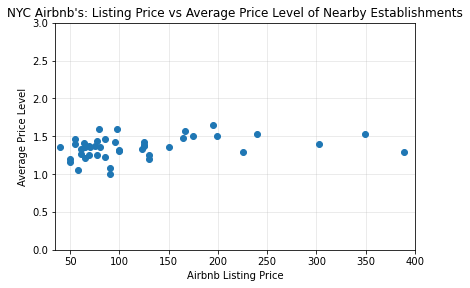

In [218]:
#Insert Data here that needs to be plotted:
#The graphs show each airbnb's price when you take into consideration the first 20 nearby establishments
x_values = sample_listings['price']
y_values = avg_price_level

#Plotting Scatter Plot
plt.plot(x_values, y_values, 'o')

#Displays correlation coefficient between the average establishment price level, and the airbnb prices...
plt.xlim(35, 400)
plt.ylim(0, 3)
plt.grid(True, alpha = 0.3)
correlation_var = st.pearsonr(sample_listings["price"], avg_price_level)
plt.tight_layout(pad=2)
plt.xlabel('Airbnb Listing Price')
plt.ylabel('Average Price Level')
plt.title("NYC Airbnb's: Listing Price vs Average Price Level of Nearby Establishments")
plt.savefig("Graphs(Reese)/NYC_Airbnb_Listing_Price_vs_Average_Price_Level.png")
print(f'Correlation coefficient = {round(correlation_var[0],2)}')
#A uphill (positive) linear relationship, but the correlation value is still low.

Correlation coefficient = -0.03


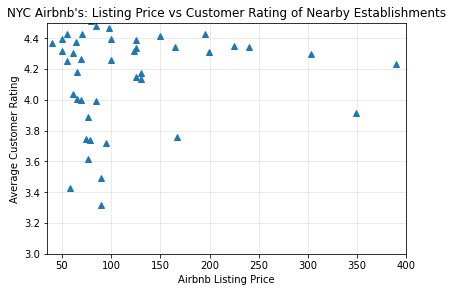

In [219]:
#Insert Data here that needs to be plotted:
x_values3 = sample_listings['price']
y_values3 = avg_rating

#Displays correlation coefficient between the average establishment ratings, and the airbnb prices...
plt.plot(x_values3, y_values3, '^')
plt.xlim(35, 400)
plt.ylim(3, 4.5)
plt.grid(True, alpha = 0.3)
plt.tight_layout(pad=2)
plt.xlabel('Airbnb Listing Price')
plt.ylabel('Average Customer Rating')
correlation_var = st.pearsonr(sample_listings["price"], avg_rating)
plt.title("NYC Airbnb's: Listing Price vs Customer Rating of Nearby Establishments")
plt.savefig("Graphs(Reese)/NYC_Airbnb_Listing_Price_vs_Customer_Rating.png")
print(f'Correlation coefficient = {round(correlation_var[0],2)}')
#There is no significant correlation value, but instead it shows a weak downhill (negative) linear relationship.